# Data Storytelling Projects with Superstore
-----

## Step 1: Loading Data and Libraries


In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("Sample - Superstore.csv", encoding='latin-1') 


# Step 2: Preprocessing Data

### Initial Data Exploration

In [7]:
data.shape

(9994, 21)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [9]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Checking NA value in the dataset

In [10]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### The descriptive statistics of the dataset

In [11]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


The dataset has an order date column. We can use this column
to create new columns like order month, order year, and order day,
which will be very valuable for sales and profit analysis 
according to time periods. So let’s add these columns:

###  Data Preparation

- Converting Date Columns

In [12]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date']) 



- Adding New Date-Based Columns

In [13]:
data['Order Month'] = data['Order Date'].dt.month 
data['Order Year'] = data['Order Date'].dt.year
data['Order Day of Week'] = data['Order Date'].dt.dayofweek



- Shipping Time

In [14]:
# Tạo cột thời gian giao hàng (số ngày giữa Order Date và Ship Date)
data['Shipping Time (days)'] = (data['Ship Date'] - data['Order Date']).dt.days


- Check dataset preparation

In [15]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of Week,Shipping Time (days)
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1,3
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6,4
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6,7
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6,7


## Step 3: Thematic Analysis with EDA

### Region and State Sales Analysis

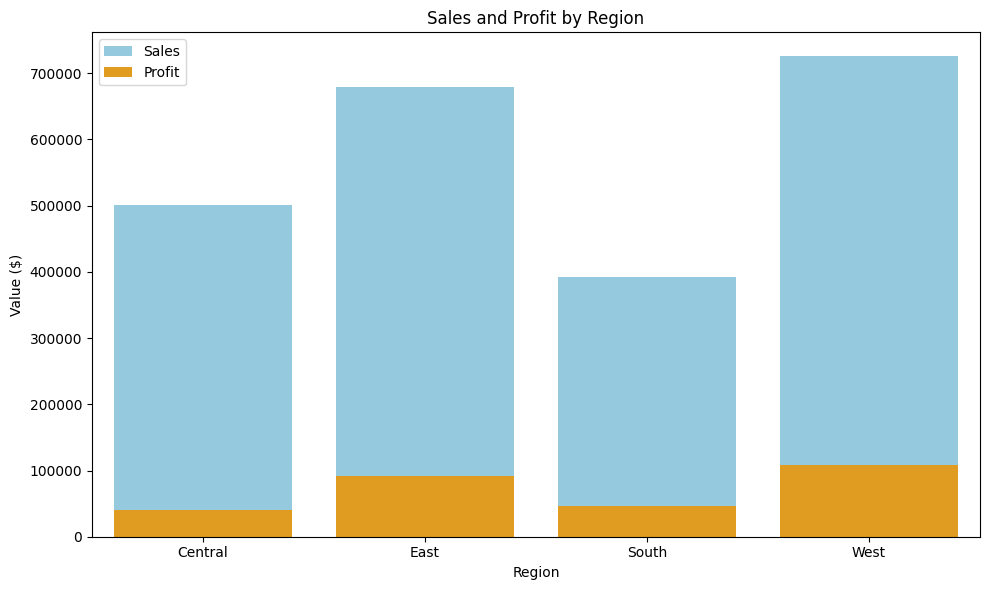

In [16]:
# Total Sales and Profit by Region
region_summary = data.groupby('Region')[['Sales', 'Profit']].sum().reset_index()

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=region_summary, x='Region', y='Sales', color='skyblue', label='Sales')
sns.barplot(data=region_summary, x='Region', y='Profit', color='orange', label='Profit')
plt.title('Sales and Profit by Region')
plt.ylabel('Value ($)')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\Win 10\AppData\Local\Temp\ipykernel_2680\3901995915.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_summary.reset_index(), x='Profit', y='State', palette='viridis')


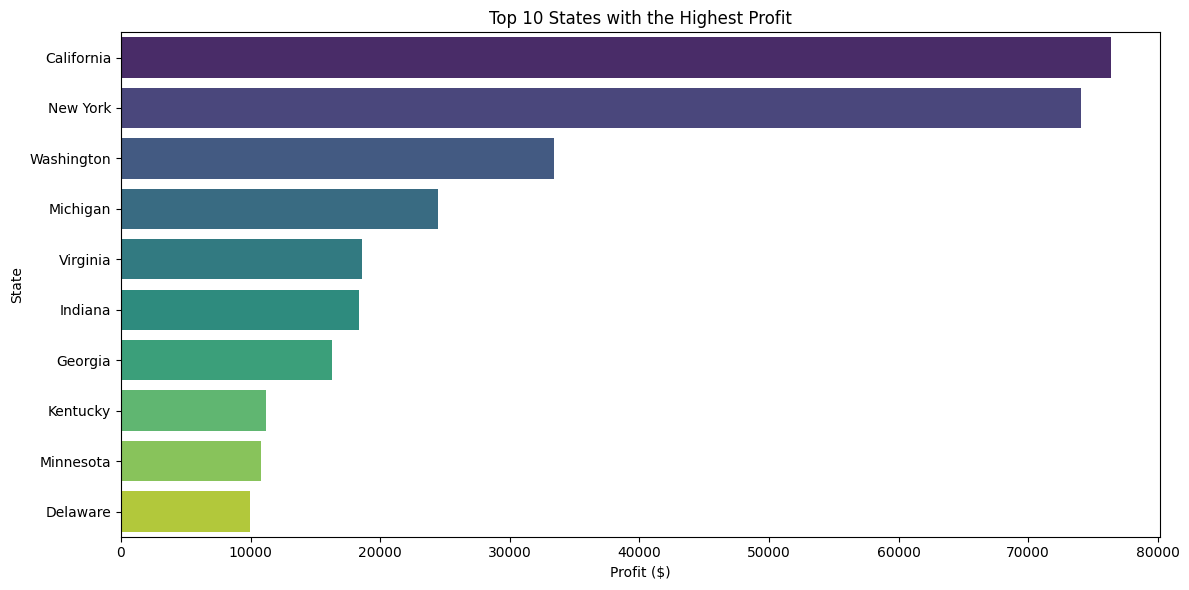

In [17]:
#Top 10 States with the Highest Profit
state_summary = data.groupby('State')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False).head(10)

# Bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=state_summary.reset_index(), x='Profit', y='State', palette='viridis')
plt.title('Top 10 States with the Highest Profit')
plt.xlabel('Profit ($)')
plt.ylabel('State')
plt.tight_layout()
plt.show()


### Monthly Sales Analysis

C:\Users\Win 10\AppData\Local\Temp\ipykernel_2680\2388410535.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order Month', y='Sales', data=monthly_sales, palette='Blues_d')


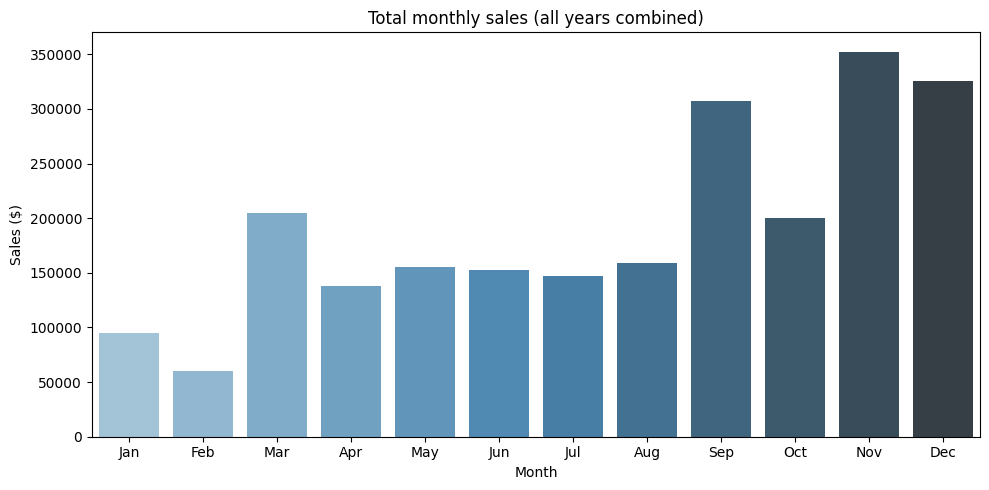

In [18]:
# Total sales by month (regardless of year)
monthly_sales = data.groupby('Order Month')['Sales'].sum().reset_index()

# Barchart
plt.figure(figsize=(10, 5))
sns.barplot(x='Order Month', y='Sales', data=monthly_sales, palette='Blues_d')
plt.title('Total monthly sales (all years combined)')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.xticks(ticks=range(0,12), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.tight_layout()
plt.show()


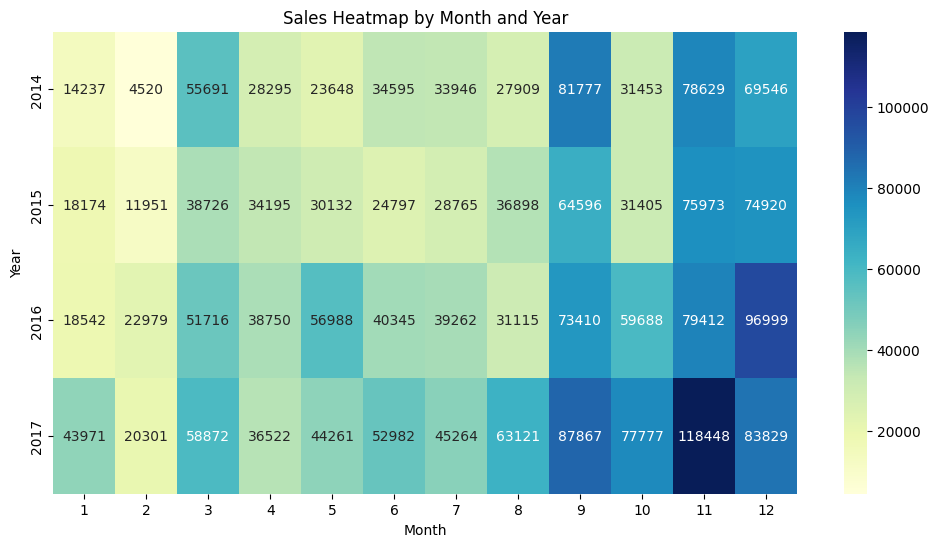

In [19]:
# Use a pivot table to show monthly and yearly sales
heatmap_data = data.pivot_table(index='Order Year', columns='Order Month', values='Sales', aggfunc='sum')

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Sales Heatmap by Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


### Sales Analysis by Category

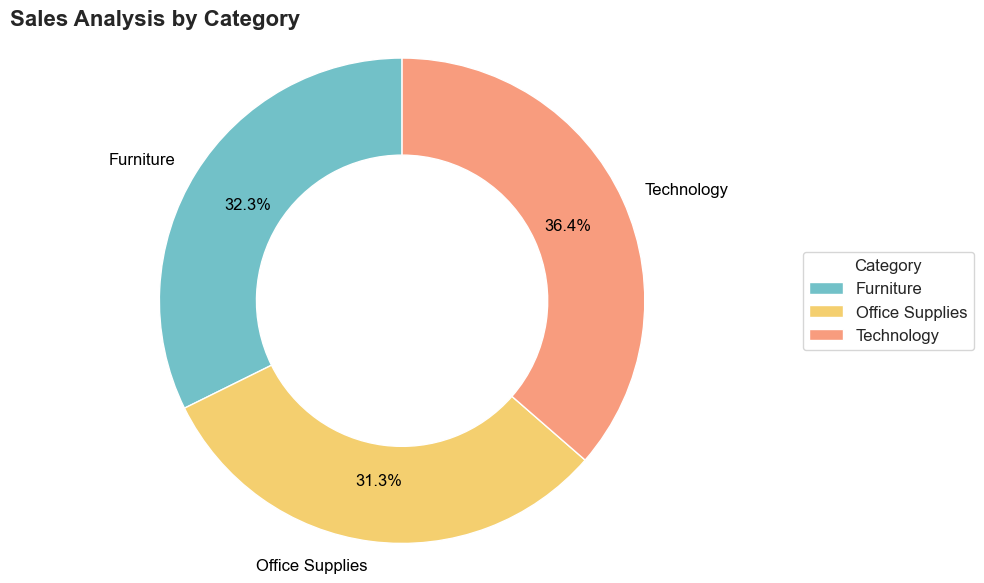

In [37]:
# Group total sales by category
category_sales = data.groupby('Category')['Sales'].sum().reset_index()

# Set colors
colors = ['#72C1C8', '#F4CF6F', '#F89C7E']  

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Donut chart
wedges, texts, autotexts = ax.pie(
    category_sales['Sales'],
    labels=category_sales['Category'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    pctdistance=0.75,
    wedgeprops=dict(width=0.4),
    textprops=dict(color='black', fontsize=12)
)

ax.axis('equal')

plt.title("Sales Analysis by Category", fontsize=16, loc='left')

# Add legend to the right top corner
ax.legend(
    wedges,
    category_sales['Category'],
    title="Category",
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)

# Adjust layout
plt.tight_layout()
plt.show()


### Sales Analysis by Sub-Category

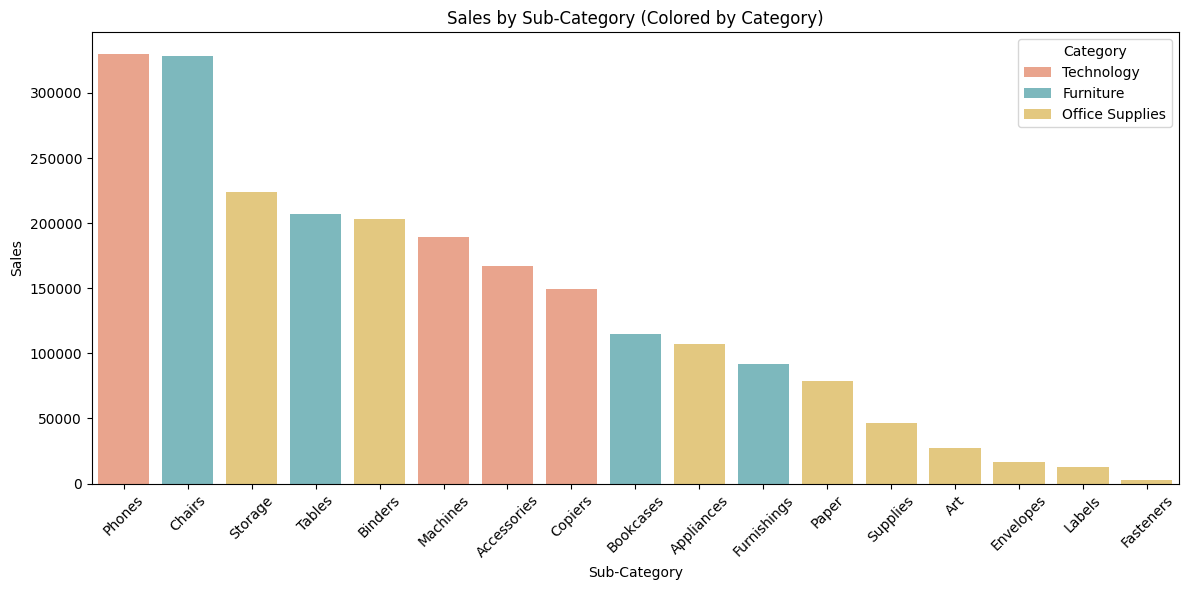

In [22]:
# Sub-Catergory Sales Summary 
subcategory_summary = data.groupby(['Category', 'Sub-Category'])[['Sales', 'Profit']].sum().reset_index()
subcategory_summary = subcategory_summary.sort_values(by='Sales', ascending=False)

# Color mapping for categories
category_colors = {
    'Furniture': '#72C1C8',
    'Office Supplies': '#F4CF6F',
    'Technology': '#F89C7E'
}

# Plotting with hue to separate by Category
plt.figure(figsize=(12, 6))
sns.barplot(data=subcategory_summary, x='Sub-Category', y='Sales', hue='Category',
            palette=category_colors, dodge=False)  # dodge=False keeps same-subcategory bars together
plt.xticks(rotation=45)
plt.title('Sales by Sub-Category (Colored by Category)')
plt.tight_layout()
plt.show()



### Monthly Profit Analysis

In [23]:
data['Order Date'] = pd.to_datetime(data['Order Date'])  # Right Date Format
data['Order YearMonth'] = data['Order Date'].dt.to_period('M')  # Year-Month grouped format


In [24]:
# Group Profit by Year-Month
monthly_profit = data.groupby('Order YearMonth')['Profit'].sum().reset_index()
monthly_profit['Order YearMonth'] = monthly_profit['Order YearMonth'].astype(str)  # Convert Period to str


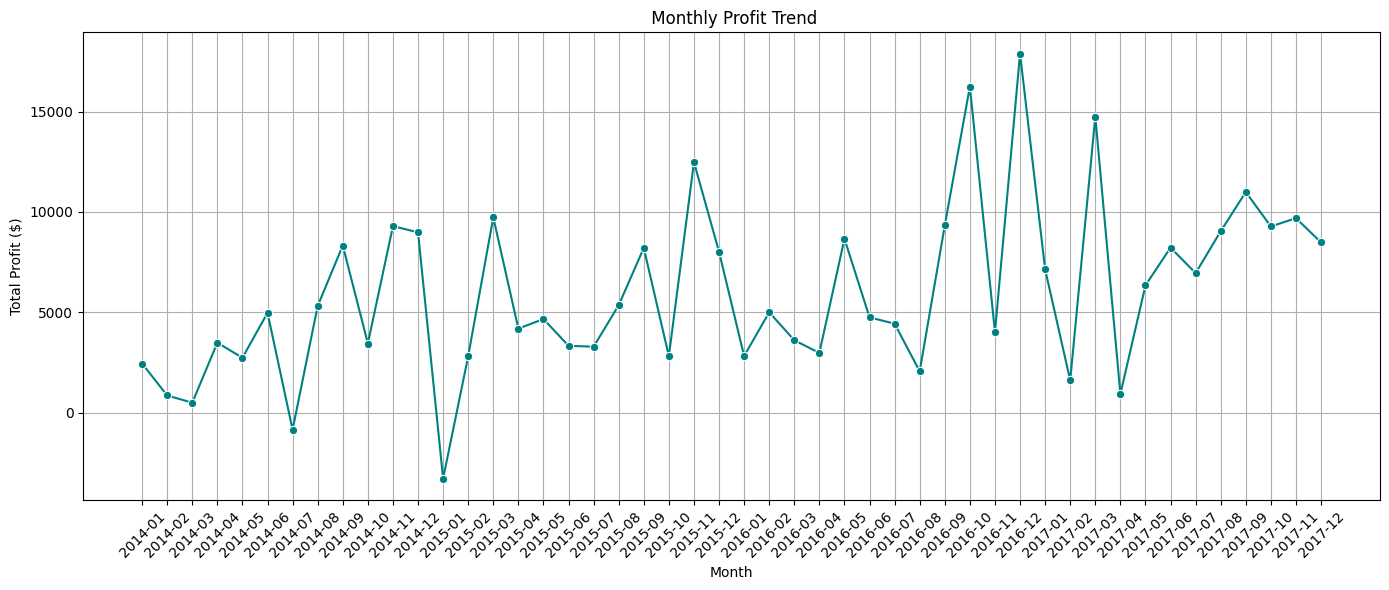

In [25]:
#Line Graph
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_profit, x='Order YearMonth', y='Profit', marker='o', color='teal')
plt.xticks(rotation=45)
plt.title(' Monthly Profit Trend')
plt.xlabel('Month')
plt.ylabel('Total Profit ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Profit Analysis by Category

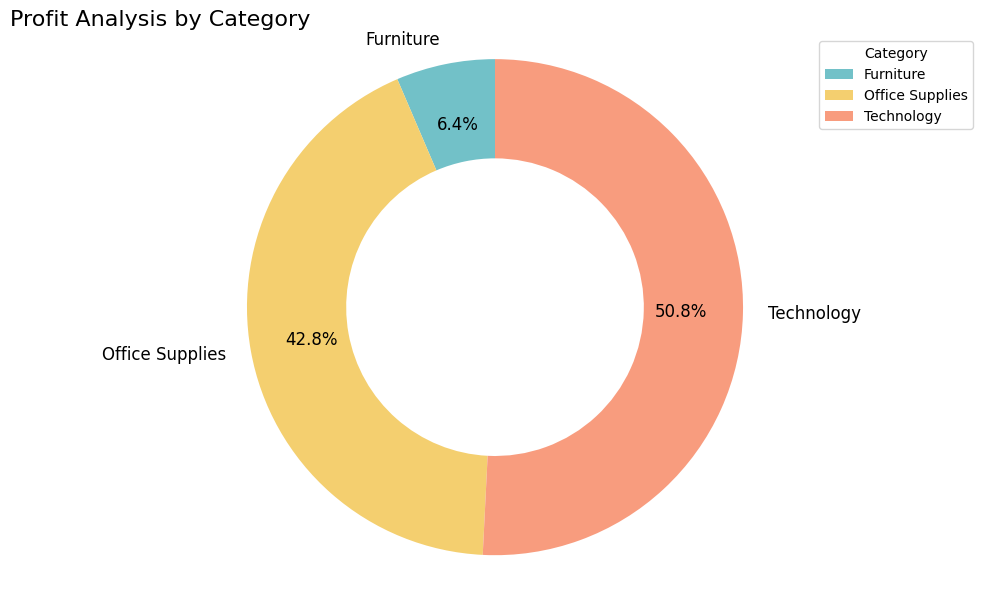

In [26]:
# Group total profit by category
category_sales = data.groupby('Category')['Profit'].sum().reset_index()

# Set colors
colors = ['#72C1C8', '#F4CF6F', '#F89C7E']  

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create donut chart
wedges, texts, autotexts = ax.pie(
    category_sales['Profit'],  
    labels=category_sales['Category'],  
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors,  
    pctdistance=0.75, 
    wedgeprops=dict(width=0.4),  
    textprops=dict(color='black', fontsize=12) 
)

# Set axis to equal for proper circular shape
ax.axis('equal')

# Move title to the left corner
plt.title("Profit Analysis by Category", fontsize=16, loc='left')  

# Add legend to the right top corner
ax.legend(
    wedges,
    category_sales['Category'],  
    title="Category",  
    loc='upper right', 
    bbox_to_anchor=(1, 1)  
)

plt.tight_layout()
plt.show()

### Profit Analysis by Sub-Category

C:\Users\Win 10\AppData\Local\Temp\ipykernel_2680\2220640536.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subcategory_summary, x='Sub-Category', y='Profit', palette=colors)
C:\Users\Win 10\AppData\Local\Temp\ipykernel_2680\2220640536.py:3: UserWarning: 
The palette list has fewer values (3) than needed (17) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=subcategory_summary, x='Sub-Category', y='Profit', palette=colors)


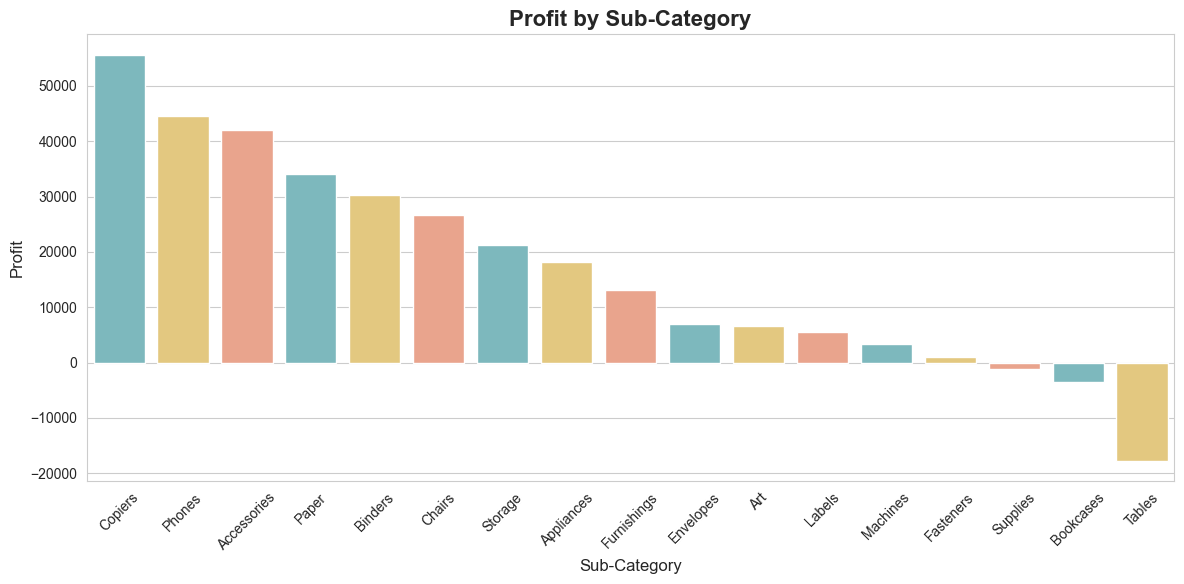

In [38]:
# Bar chart: Profit by Sub-Category
plt.figure(figsize=(12, 6))
sns.barplot(data=subcategory_summary, x='Sub-Category', y='Profit', palette=colors)
plt.xticks(rotation=45)
plt.title('Profit by Sub-Category')
plt.tight_layout()
plt.show()


### Sales and Profit Analysis by Customer Segment

In [28]:
from matplotlib.ticker import FuncFormatter 


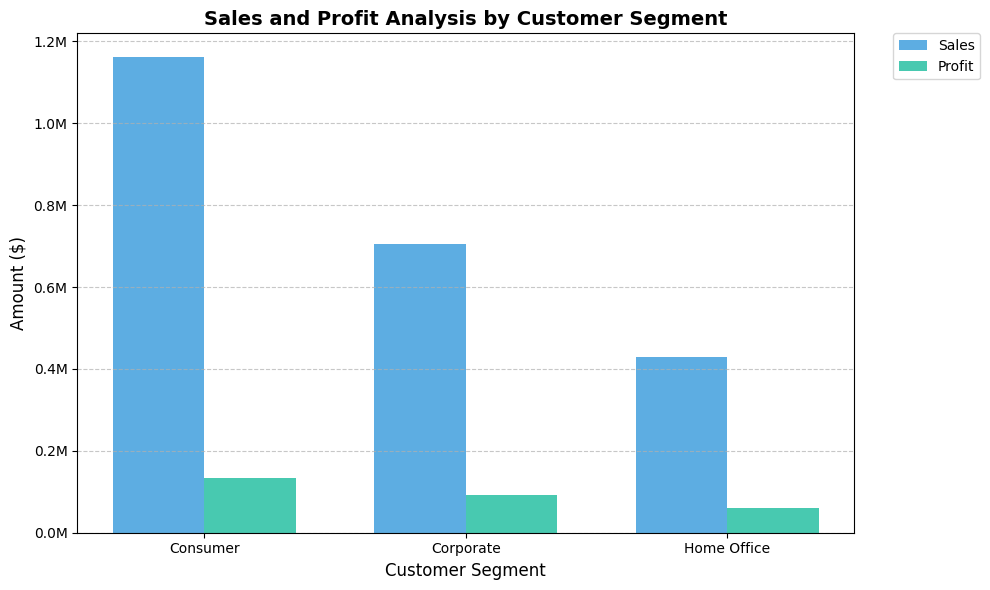

In [29]:

segment_data = data.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(segment_data))  # Using numpy array for indexing

# Sales bar
plt.bar(index, segment_data['Sales'], width=bar_width, label='Sales', color='#5DADE2')

# Profit bar
plt.bar(index + bar_width, segment_data['Profit'], width=bar_width, label='Profit', color='#48C9B0')

# Format Y-axis to show in millions (e.g., 1M, 2M)
def millions(x, pos):
    return f'{x / 1e6:.1f}M'  # Adjusted for decimal points

# Apply formatter to Y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))  # FuncFormatter is now correctly imported

# Labels & formatting
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.title('Sales and Profit Analysis by Customer Segment', fontsize=14, weight='bold')
plt.xticks(index + bar_width / 2, segment_data['Segment'], fontsize=10)  # Enhanced tick labels
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



### Shipping Time vs Profit

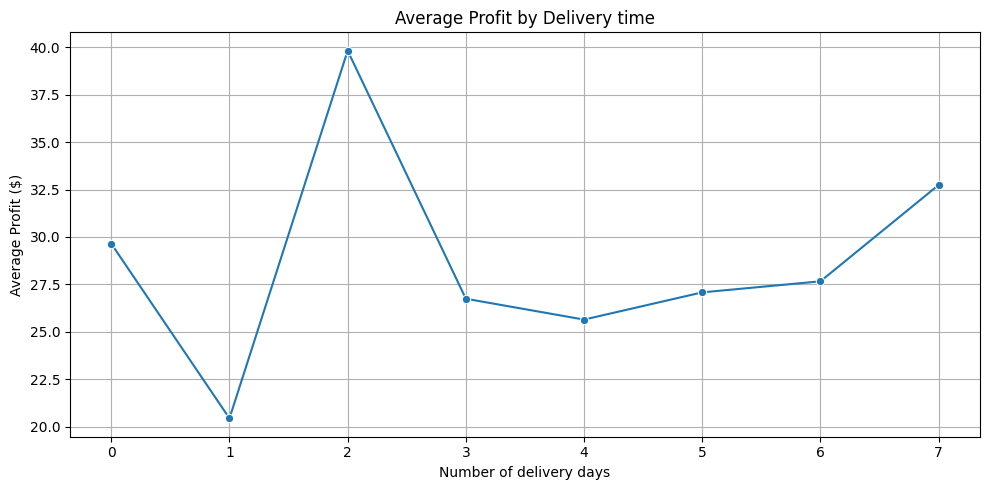

In [30]:
# Average Profit by Delivery time
shipping_impact = data.groupby('Shipping Time (days)')['Profit'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 5))
sns.lineplot(data=shipping_impact, x='Shipping Time (days)', y='Profit', marker='o')
plt.title('Average Profit by Delivery time')
plt.xlabel('Number of delivery days')
plt.ylabel('Average Profit ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Analysing Sales-to-Profit ratio

In [ ]:
sales_profit_by_segment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
sales_profit_by_segment['Sales_to_Profit_Ratio'] = sales_profit_by_segment['Sales'] / sales_profit_by_segment['Profit']
print(sales_profit_by_segment[['Segment', 'Sales_to_Profit_Ratio']])


       Segment  Sales_to_Profit_Ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416


C:\Users\Win 10\AppData\Local\Temp\ipykernel_2680\1694625745.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Sales_to_Profit_Ratio', data=sales_profit_by_segment, palette='viridis')


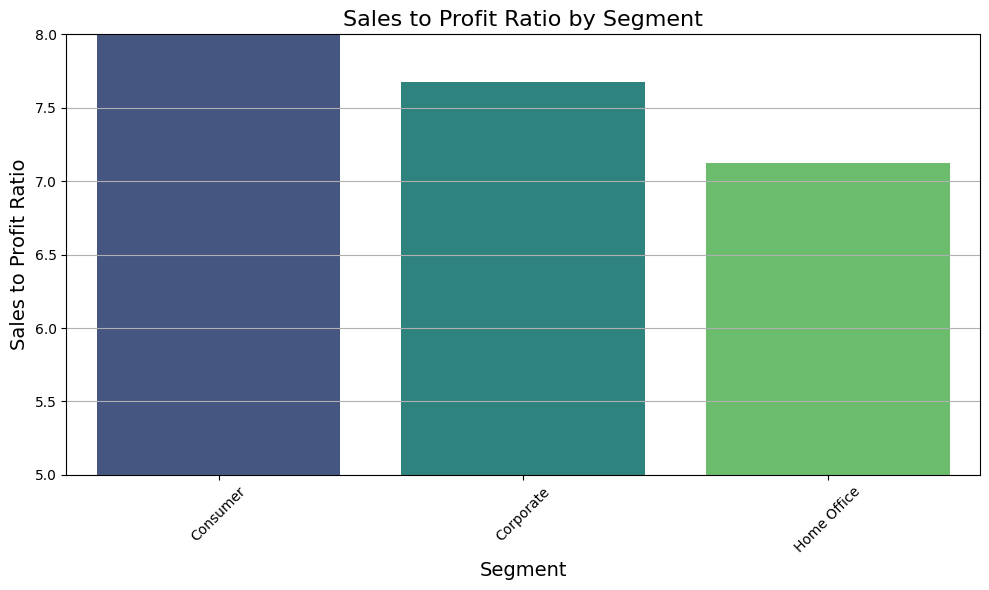

In [32]:
# Create the bar plot
plt.figure(figsize=(10, 6))

# Use a color palette for different segments
colors = sns.color_palette("husl", len(sales_profit_by_segment))

sns.barplot(x='Segment', y='Sales_to_Profit_Ratio', data=sales_profit_by_segment, palette='viridis')

# Setting y-axis range from 5 to 8
plt.ylim(5, 8)

# Adding titles and labels
plt.title('Sales to Profit Ratio by Segment', fontsize=16)
plt.xlabel('Segment', fontsize=14)
plt.ylabel('Sales to Profit Ratio', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

----
### Final Dashboard
